In [1]:
# Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# Import Hulu data

hulu_df = pd.read_csv("../CSV Resources/hulu.csv")
hulu_df = hulu_df.set_index('Title')
hulu_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [3]:
# Drop all data that is missing a rating

hulu_df_dropped = hulu_df.dropna()
hulu_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [4]:
# Convert Rotten Tomatoes ratings from percentages to integers

hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
hulu_df_dropped.head()

<ipython-input-4-c158f8ff0a63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Attack on Titan,2013,16+,8.8,94%,94
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%,100
Community,2009,7+,8.5,88%,88
Parks and Recreation,2009,16+,8.6,93%,93
Twin Peaks,1990,18+,8.8,89%,89


In [6]:
# Create DataFrame to highlight Hulu ratings

imdb_average = hulu_df['IMDB'].mean()
rounded_imdb_average = round(imdb_average, 2)
rotten_average = hulu_df_dropped['RT'].mean()
rounded_rotten_average = round(rotten_average, 2)
age_group = hulu_df['Age'].mode()
total_shows = len(hulu_df)
title = hulu_df.index.to_list()

hulu_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = hulu_df.index[0]

hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
hulu_df_dropped.head(100)
highest_rated_rt = hulu_df_dropped.index[0]

hulu = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
hulu

<ipython-input-6-b58468a64d6b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1754,16+,Destiny,7.061107,Fullmetal Alchemist: Brotherhood,78.294286


In [7]:
# Add year ranges column

hulu_df = hulu_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(hulu_df['Year'], bins, labels=groups)

hulu_df['Year Range'] = pd.cut(hulu_df['Year'], bins, labels=groups)
hulu_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Year Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020


In [8]:
# Group year ranges together

age_range_df = hulu_df.groupby("Year Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Year Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020
...,...,...,...,...,...,...
1364,This Week,1981,7+,5.5,NaN,1980-1989
1368,Meet the Press,1947,all,5.5,NaN,1900-1949
1387,Baywatch,1989,7+,5.3,NaN,1980-1989
1392,The Munsters Today,1988,NaN,5.3,NaN,1980-1989


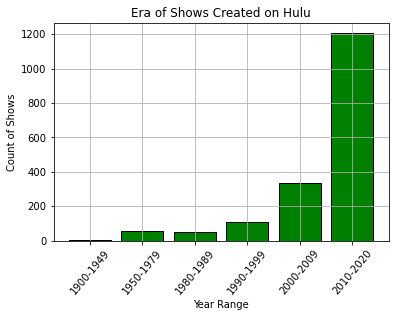

In [13]:
# Create bar chart represeting year range 

ranges = age_range_df["Year Range"].count()
plt.bar(groups, ranges, color = 'green', edgecolor = 'black');
plt.title('Era of Shows Created on Hulu');
plt.xlabel('Year Range')
plt.ylabel('Count of Shows')
plt.xticks(rotation=50);
plt.grid();

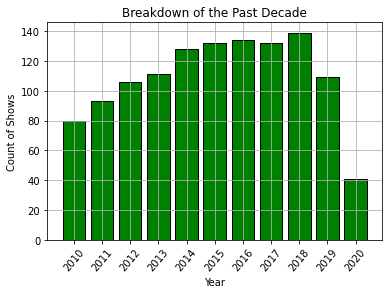

In [14]:
# Bar chart to breakdown number of movies per year in the last decade

hulu_years = hulu_df.groupby("Year")
hulu_year_count = hulu_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(top_11_years,hulu_year_count['Title'], color = 'green', edgecolor = 'black');
plt.title('Breakdown of the Past Decade');
plt.xlabel('Year');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();

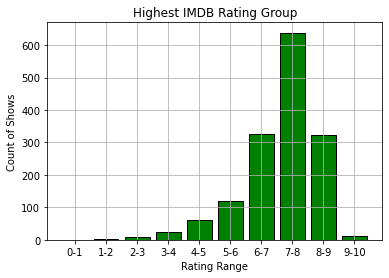

In [15]:
# Group IMDB ratings into bins to create a bar graph

bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
hulu_df['IMDB Rating Ranges'] = pd.cut(hulu_df['IMDB'], bins2, labels=groups2)

imdb_rating_ranges = hulu_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()

plt.bar(groups2, ranges2, color = 'green', edgecolor = 'black');
plt.title('Highest IMDB Rating Group');
plt.xlabel('Rating Range');
plt.ylabel('Count of Shows');
plt.grid();

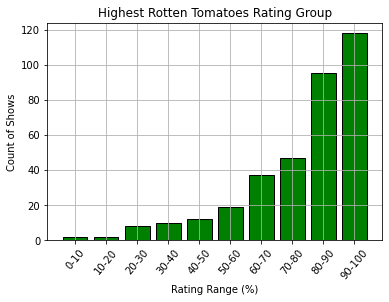

In [18]:
# Group Rotten Tomatoes ratings into bins to create a bar graph

bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
hulu_df_dropped['RT Rating Ranges'] = pd.cut(hulu_df_dropped['RT'], bins3, labels=groups3)

rt_rating_ranges = hulu_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()

plt.bar(groups3, ranges3, color = 'green', edgecolor = 'black');
plt.title('Highest Rotten Tomatoes Rating Group');
plt.xlabel('Rating Range (%)');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();

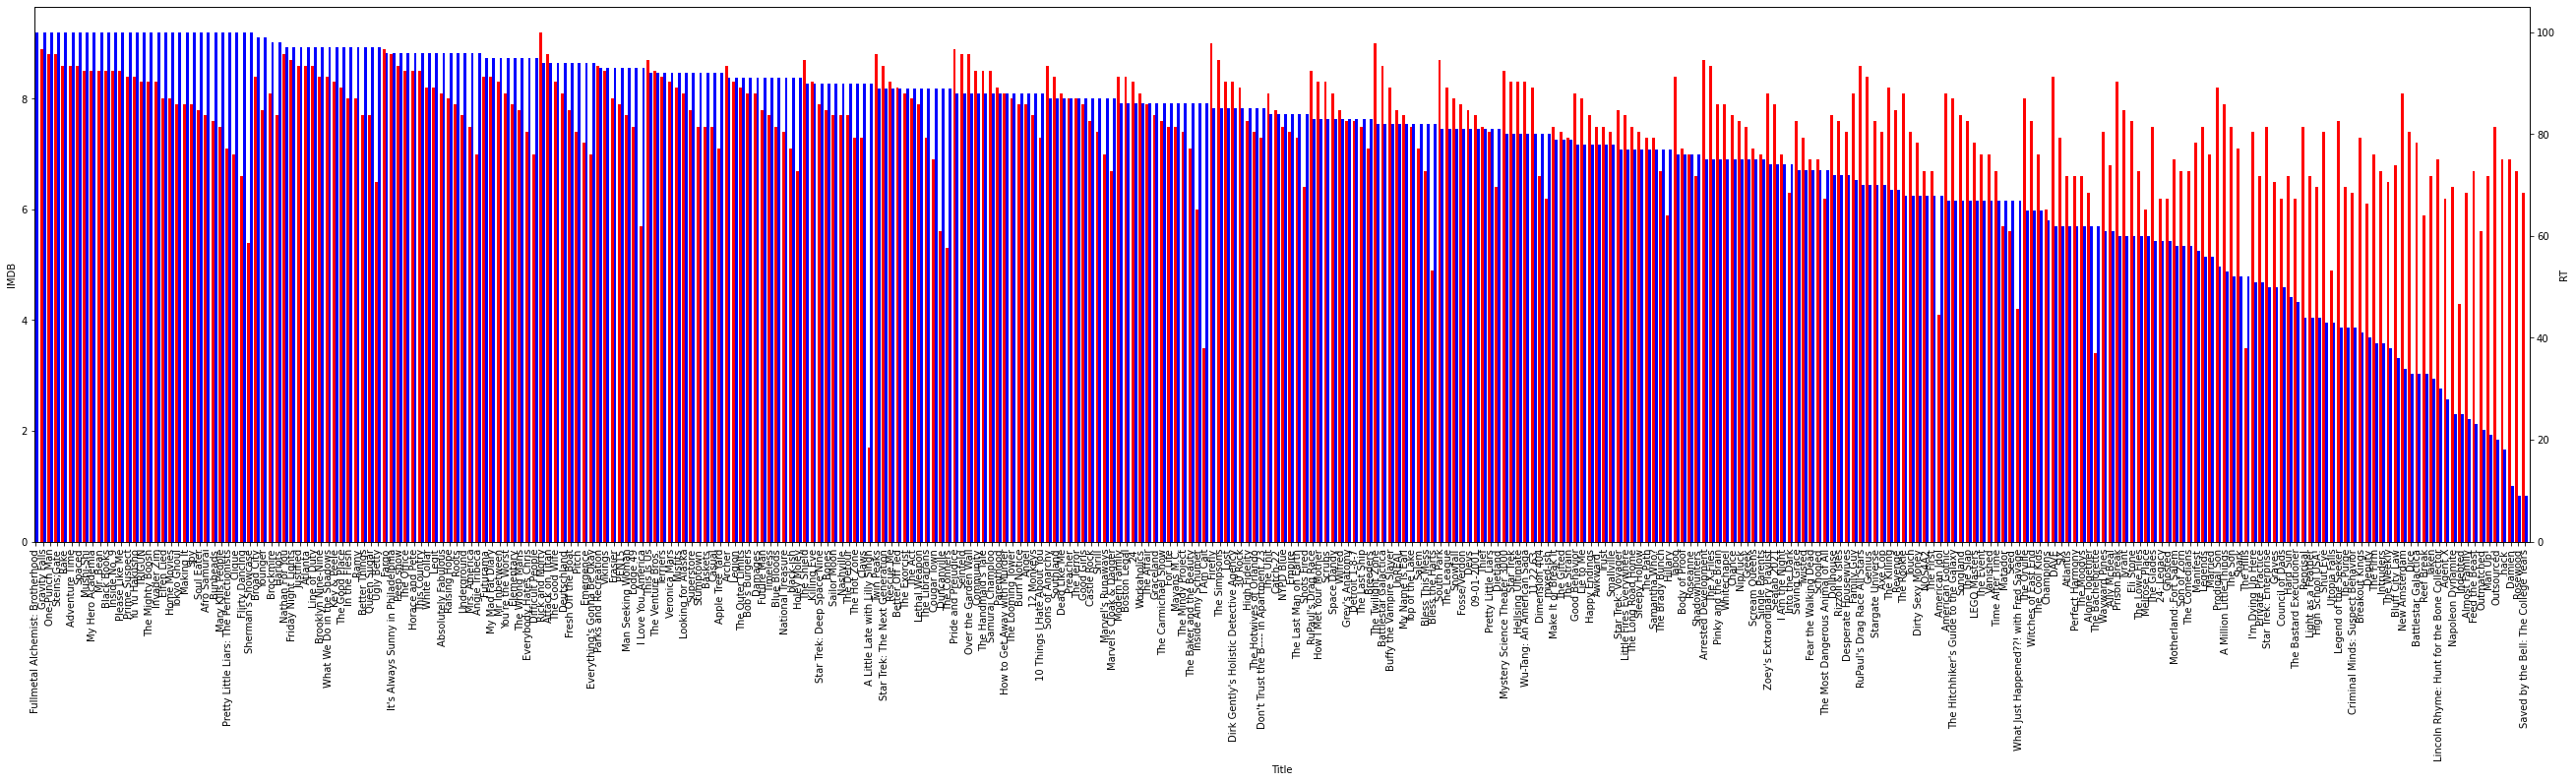

In [19]:
# Compares each show's IMDB and Rotten Tomatoes' rating

fig = plt.figure(figsize=(100,10)) 
ax = fig.add_subplot(121) 
ax2 = ax.twinx()
width = 0.4
hulu_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1);
hulu_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');

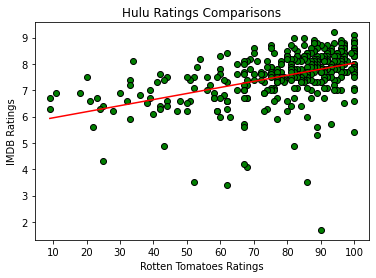

The correlation between both factors is 0.46


In [24]:
# Find any correlation between IMDB & Rotten Tomatoes ratings using scatter plot

hulu_RT = hulu_df_dropped['RT']
hulu_IMBD_ratings = hulu_df_dropped['IMDB']


x_values = hulu_RT
y_values = hulu_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(hulu_RT,hulu_IMBD_ratings, facecolor='green', edgecolor="black");
plt.plot(x_values,regress_values,"red")
plt.title('Hulu Ratings Comparisons')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Rotten Tomatoes Ratings')
plt.ylabel('IMDB Ratings')
plt.xlim = (0,100)
plt.show()

correlation = st.pearsonr(hulu_RT,hulu_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")

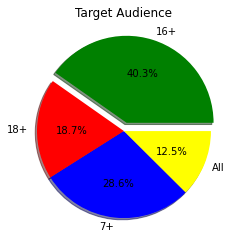

In [34]:
# Hulu Target Audience pie chart

hulu_age_group = hulu_df.groupby("Age")
age_count = hulu_age_group.count()

explode = (0.1,0,0,0)
# labels = ['13+','16+','18+','7+','All']
labels = ['16+','18+','7+','All']
colors = ['green','red','blue','yellow']

plt.pie(age_count['Title'],explode = explode, colors = colors, labels = labels, autopct="%1.1f%%", shadow=True);
plt.title('Target Audience');

In [32]:
#TEST TO MATCH UP WITH PIE CHART, DELETE THIS ONCE ALL 4 FILES CHECK OUT
hulu_df['Age'].value_counts()

16+    514
7+     365
18+    239
all    159
Name: Age, dtype: int64